In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dogHorse_df = pd.read_csv("dog_horse.csv") #Load the dataset

In [4]:
dogHorse_df.drop(['Unnamed: 0','type'],axis=1,inplace=True ) #remove index column

In [5]:
dogHorse_df.shape

(200, 3)

In [6]:
#print columns along with the type
for i in dogHorse_df.columns:
    print(f"Column Name: {i}" ,"|",f"type: {dogHorse_df[i].dtype}")

Column Name: height | type: float64
Column Name: weight | type: float64
Column Name: target | type: float64


In [7]:
dogHorse_df['target'] = dogHorse_df.target.astype('int') #change the target columns to int

In [8]:
dogHorse_df.isnull().sum() #to shows null values

height    0
weight    0
target    0
dtype: int64

In [9]:
print(dogHorse_df.target.value_counts()) #data distrbution for the target columns

0    100
1    100
Name: target, dtype: int64


In [10]:
x = dogHorse_df.iloc[:,:2] #set the features
y = dogHorse_df.iloc[:,-1] #set the target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.20 , random_state=42) #split the data

In [12]:
DecisionTree = DecisionTreeClassifier() #init Decision Tree Classifier
DecisionTree.fit(X_train,y_train) #fit the train data

DecisionTreeClassifier()

In [13]:
print(f"Accuracy = {DecisionTree.score(X_test,y_test)}")

Accuracy = 0.975


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



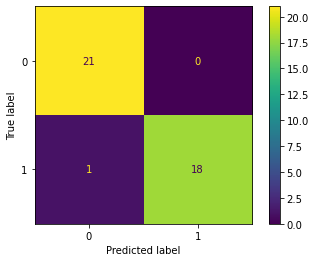

In [14]:
y_pre = DecisionTree.predict(X_test) #predict
print(classification_report(y_test,y_pre ))
plot_confusion_matrix(DecisionTree, X_test, y_test)

[Text(0.6666666666666666, 0.9285714285714286, 'height <= 45.5\ngini = 0.5\nsamples = 160\nvalue = [79, 81]\nclass = 1'),
 Text(0.5, 0.7857142857142857, 'weight <= 121.5\ngini = 0.167\nsamples = 87\nvalue = [79, 8]\nclass = 0'),
 Text(0.3333333333333333, 0.6428571428571429, 'height <= 40.5\ngini = 0.07\nsamples = 82\nvalue = [79, 3]\nclass = 0'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]\nclass = 0'),
 Text(0.5, 0.5, 'height <= 43.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]\nclass = 0'),
 Text(0.3333333333333333, 0.35714285714285715, 'weight <= 100.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = 0'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.5, 0.21428571428571427, 'height <= 41.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.6666666666666666, 0.0714285714285714

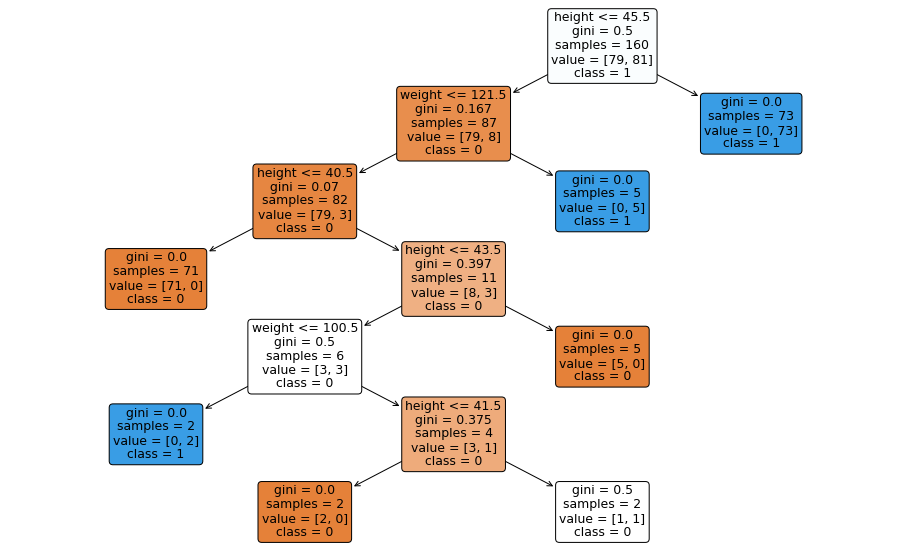

In [15]:
plt.figure(figsize=(16,10))

tree.plot_tree(
    DecisionTree, 
    filled=True,
    rounded=True,
    feature_names=["height","weight"],
    class_names= [str(x) for x in DecisionTree.classes_])

In [16]:
AdvaDecisionTree = DecisionTreeClassifier() #init Decision Tree Classifier
AdvaDecisionTree.get_params().keys() #to show classifier hyperparameter 

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [17]:
#set classifier hyperparameter 
HyperParmeters = {  'criterion':['gini' ,'entropy'],
                    'splitter':["best", "random"],
                    'random_state':[42],
                    'max_depth': [1,2,3],
                    'min_samples_split': [2,3,4],
                    'min_samples_leaf': [1,2,3],
                    'max_features':['auto', 'sqrt', 'log2'], }

GridSearch = GridSearchCV(estimator=AdvaDecisionTree,param_grid=HyperParmeters) #passing the estimator and the HyperParmeters to GridSearch for the best model
GridSearch.fit(X_train,y_train) #fit the train data

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4], 'random_state': [42],
                         'splitter': ['best', 'random']})

In [18]:
print(f"Best Estimator Parmeters: {GridSearch.best_params_}")

Best Estimator Parmeters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



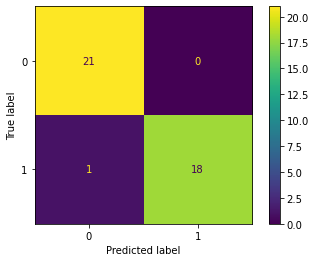

In [19]:
print(classification_report(y_test, GridSearch.predict(X_test)))
plot_confusion_matrix(DecisionTree, X_test, y_test)

[Text(0.6, 0.875, 'height <= 45.5\ngini = 0.5\nsamples = 160\nvalue = [79, 81]\nclass = 1'),
 Text(0.4, 0.625, 'height <= 40.5\ngini = 0.167\nsamples = 87\nvalue = [79, 8]\nclass = 0'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]\nclass = 0'),
 Text(0.6, 0.375, 'weight <= 121.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]\nclass = 0'),
 Text(0.4, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]\nclass = 0'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 73\nvalue = [0, 73]\nclass = 1')]

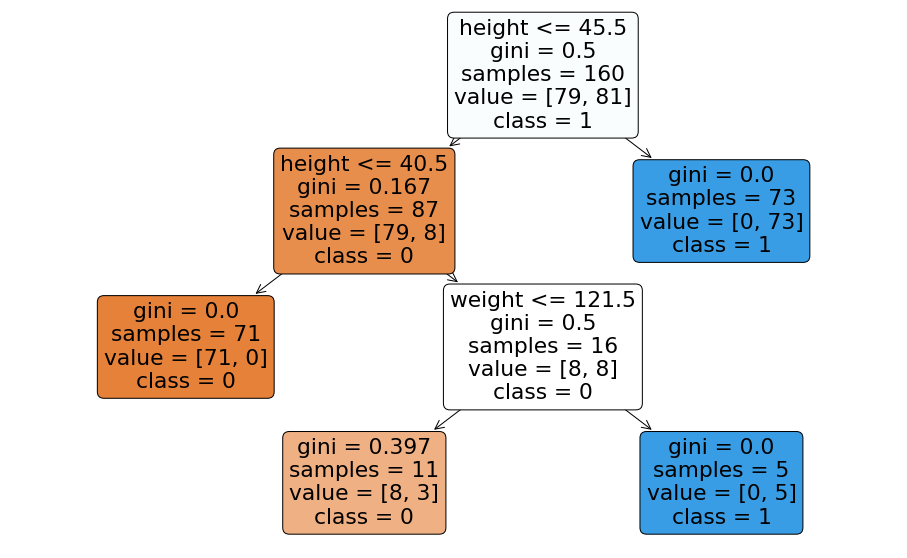

In [20]:
plt.figure(figsize=(16,10))

tree.plot_tree(
    GridSearch.best_estimator_, 
    filled=True,
    rounded=True,
    feature_names=["height","weight"],
    class_names= [str(x) for x in GridSearch.classes_])